# Figure 3c. UpSet plot summarizing the colocalization patterns across 6 pseudo-bulk brain cell-type eQTL data.

UpSet plot summarizing the colocalization patterns across 6 pseudo-bulk brain cell-type eQTL data, along with bulk-xQTL data. We highlight putative causal variants with (i) shared effect across multiple brain cell types, and (ii) cell-type specific effect obtained through colocalization between bulk xQTL and pseudo-bulk eQTL for that cell type. 

In [1]:
library(tidyverse)
library(ggpattern)
library(ggpubr)
library(cowplot)
res <- readRDS("data/xQTL_only_colocalization.rds")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:ggpubr’:

    get_legend


The following object is masked from ‘package:lubridate’:

    stamp




## Organize input data

In [4]:
all_pheno <- c("Mic","Ast","Oli","OPC","Exc","Inh","DLPFC","AC","PCC","Monocyte","pQTL",
               "AC_productive","AC_unproductive","DLPFC_productive","DLPFC_unproductive","PCC_productive","PCC_unproductive")
coloc_pheno <- lapply(res$colocalized_phenotypes, function(cp){ strsplit(cp, "; ")[[1]] })
coloc <- lapply(all_pheno, function(y) {
  pos <- sapply(coloc_pheno, function(cp) y %in% cp ) 
  which(pos)
})
names(coloc) <- all_pheno

coloc_bulk_xQTL <- unique(unlist(coloc[7:17]))
coloc_pseudo <- coloc[1:6]
coloc_xQTL <- c(coloc_pseudo, list(coloc_bulk_xQTL))
names(coloc_xQTL) <- c("Microglia\n (Mic)", "Astrocytes\n (Ast)", "Oligodendrocytes\n (Oli)",
                       "Oligodendrocyte Progenitor\n Cells (OPC)", "Excitatory neuron\n (Exc)", "Inhibitory neuron\n (Inh)",
                       "bulk-xQTL\n (11 contexts)")
coloc_xQTL[[7]] <- intersect(coloc_xQTL[[7]], unlist(coloc_xQTL[1:6]))

## UpSet plot

In [5]:
library("UpSetR")
max_size <- max(sapply(coloc_xQTL, length))
p1 <- upset(fromList(coloc_xQTL),
            order.by = "freq",
            keep.order = T,
            main.bar.color = "steelblue3",
            sets.bar.color = "sandybrown",
            text.scale = c(2,2,2.5,2,2,0), # Adjust font sizes for the main title, set names, set sizes, intersection sizes, and axis titles
            matrix.color = "black", # Adjust the color of matrix dots
            number.angles = 30, # Adjust the angle of number labels, useful for some plots
            mb.ratio = c(0.5, 0.5), # Adjust the ratio of main bar and sets bar
            point.size = 6, line.size = 1.5,
            sets = c("Microglia\n (Mic)", "Oligodendrocyte Progenitor\n Cells (OPC)", "Oligodendrocytes\n (Oli)",
                     "Astrocytes\n (Ast)", "Inhibitory neuron\n (Inh)", "Excitatory neuron\n (Exc)",
                     "bulk-xQTL\n (11 contexts)"),
            nsets = length(coloc_xQTL),
            set_size.show = TRUE,
            set_size.angles = 0,
            set_size.numbers_size = 7,
            set_size.scale_max = max_size + 0.3*max_size,
            nintersects = 20,
            mainbar.y.label = "Number of 95% CoS for\n each configuration",
            sets.x.label = NULL)

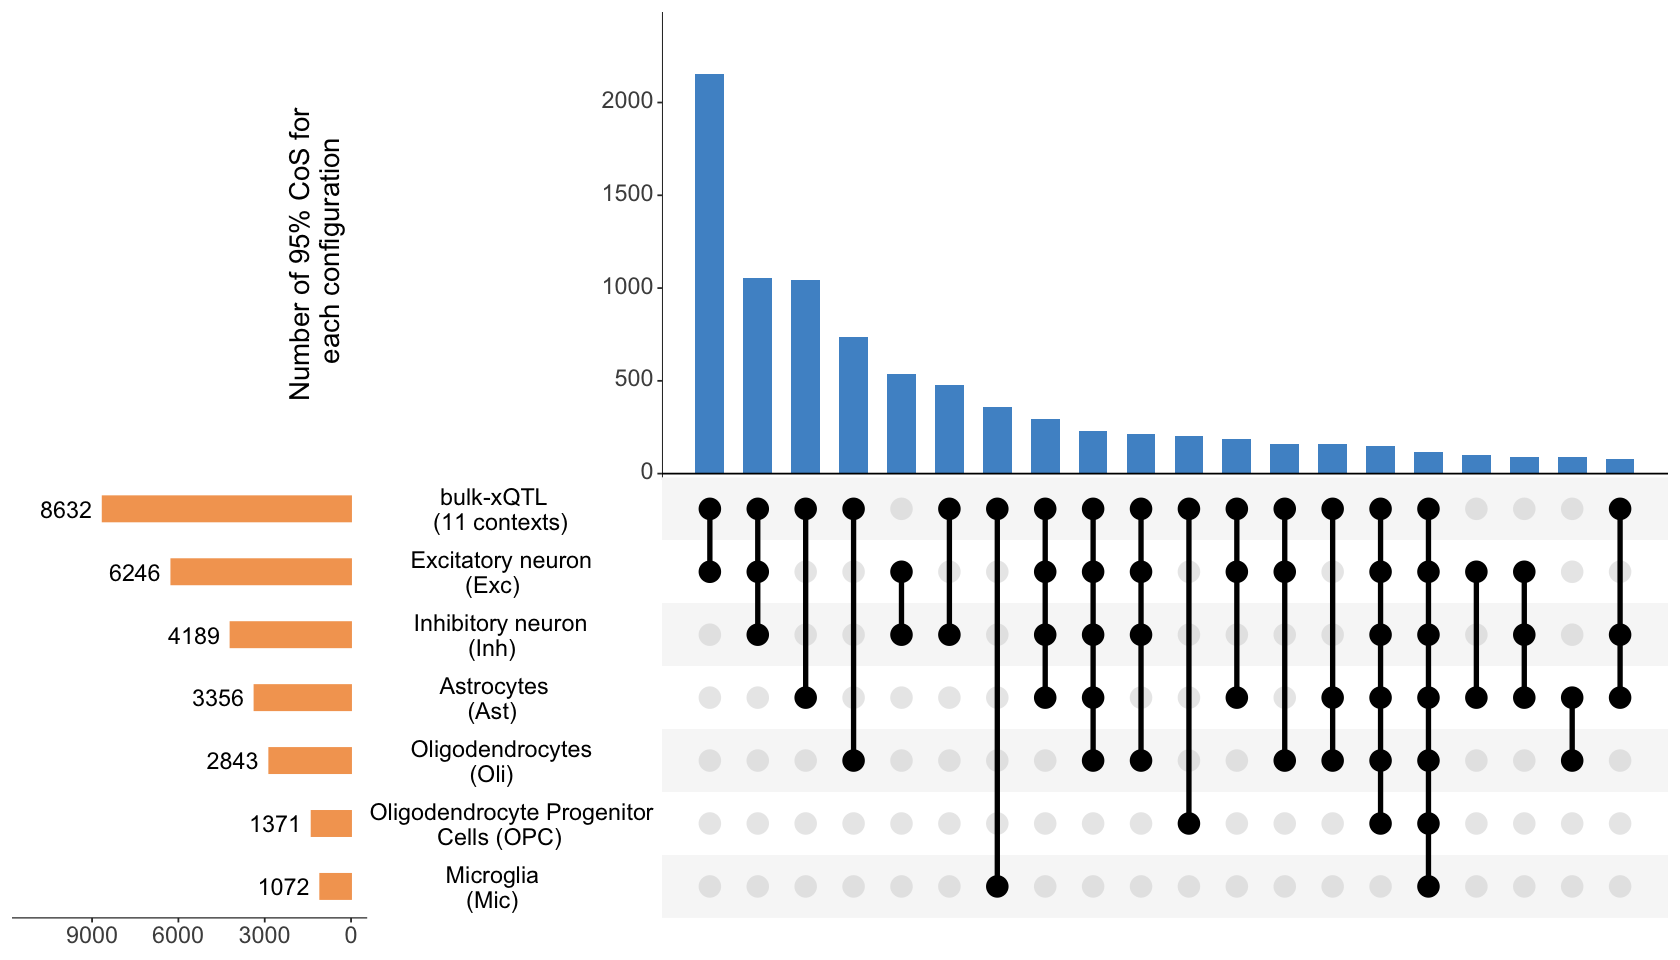

In [6]:
options(repr.plot.width = 14, repr.plot.height = 8)
p1